In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

c:\Users\HP\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
image = get_image('D:\Documents\Color identification\download.jpg')
number_of_colors = 10
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters=number_of_colors, n_init=10)  # Explicitly set n_init
labels = clf.fit_predict(modified_image)

In [9]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

([<matplotlib.patches.Wedge at 0x26907f3c050>,
 [Text(1.085714649911971, 0.17670228908117355, '#88b643'),
  Text(0.8579191533820564, 0.6884582240486461, '#3182c4'),
  Text(0.06966966401085808, 1.0977914819839942, '#df2929'),
  Text(-0.8498595888196918, 0.6983829030633729, '#d1366d'),
  Text(-1.0989786545329954, -0.0473911055035374, '#3a4290'),
  Text(-0.8796531589644841, -0.6604622017373925, '#a52063'),
  Text(-0.46881537648998683, -0.9950940371475212, '#ebcb22'),
  Text(-0.01803753323870115, -1.0998521025095434, '#fdfcfd'),
  Text(0.7126104427843881, -0.8379656059974291, '#e27d2e'),
  Text(1.0757182862023922, -0.22984814275905788, '#732d89')])

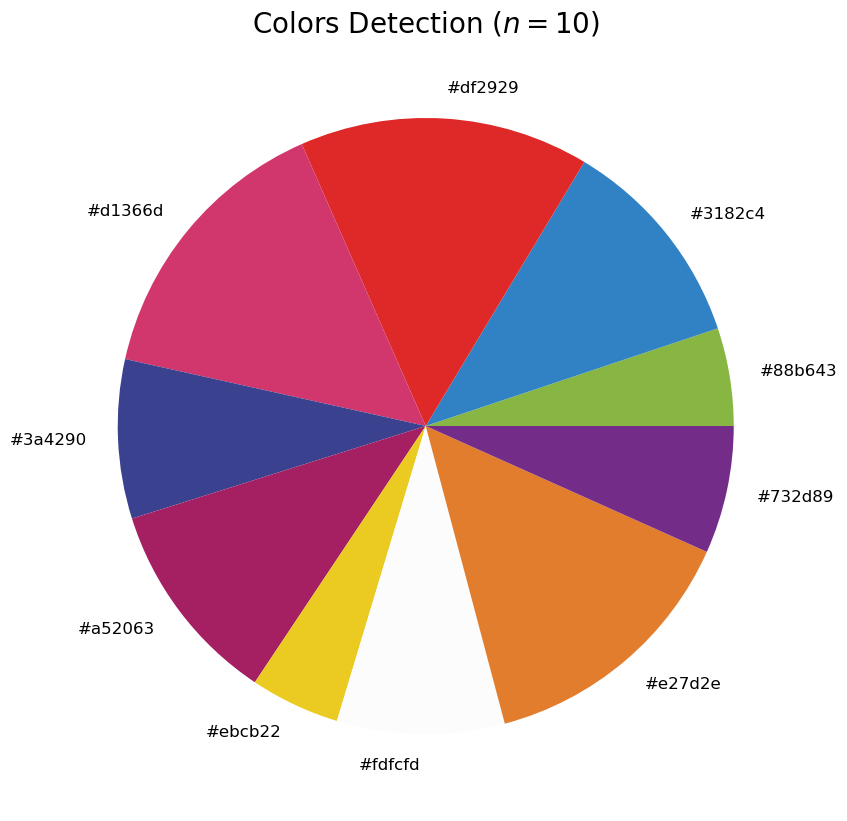

In [10]:
plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [7]:
for i in range(len(rgb_colors)):
    rgb_colors[i] = rgb_colors[i].astype(int)

In [13]:
def square_maker():
    inp_img = image
    h = int(inp_img.shape[0])
    step_h = int(h / 10)
    w = int(inp_img.shape[1])
    step_w = int(w / 10)

    desired_height = 20  # Set your desired height
    desired_width = 20   # Set your desired width
    
    common_shape = (desired_height, desired_width)  # Set your desired common shape
    
    X = np.arange(0, h + step_h, step_h)
    Y = np.arange(0, w + step_w, step_w)
    squares = [cv2.resize(inp_img[0:step_h, 0:step_w], common_shape)]  # Resize the initial square
    
    for i in range(0, len(X) - 1):
        for j in range(0, len(Y) - 1):
            square = inp_img[X[i]:X[i + 1], Y[j]:Y[j + 1]]
            square_resized = cv2.resize(square, common_shape)
            squares.append(square_resized)

    return np.array(squares)[1::]

In [14]:
def color_computing(array):
    DIFF = []
    squared_image = square_maker()
    for square in squared_image:
        DIFF_COLOR = []
        for color in range(len(rgb_colors)):
            diff = np.abs(square - rgb_colors[color])
            DIFF_COLOR.append(diff.mean())
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)

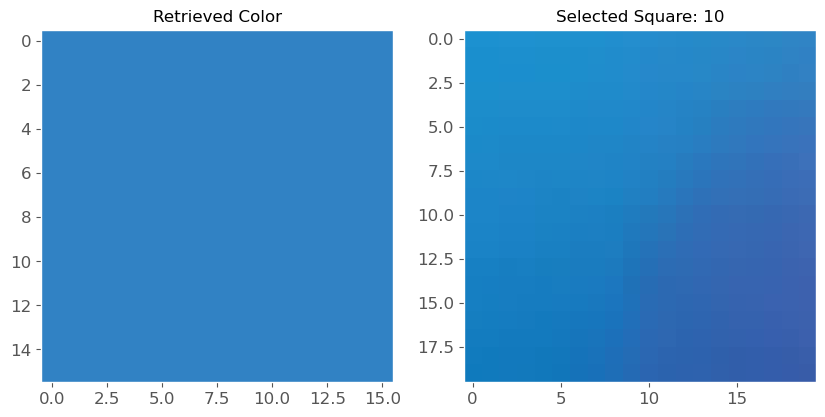

In [15]:
def best_color_plot(selected_slice):
    plt.subplot(1,2,1)
    plt.title('Retrieved Color')
    plt.imshow((np.zeros((16,16,3))+ rgb_colors[color_computing(image)[selected_slice].argmin()]).astype(int))
    plt.subplot(1,2,2)
    plt.title('Selected Square: '+ str(selected_slice))
    plt.imshow(square_maker()[selected_slice])

best_color_plot(10)

In [17]:
def build_summary():
    results = color_computing(image)
    cols = ['Square Number'] + hex_colors
    sorted_results = pd.DataFrame(columns=cols)

    for k, r in enumerate(results):
        percentages = [color_percent * 100 / r.sum() for color_percent in r]
        row_data = {'Square Number': int(k), **dict(zip(hex_colors, percentages))}
        row_df = pd.DataFrame([row_data])
        sorted_results = pd.concat([sorted_results, row_df], ignore_index=True)

    sorted_results['Square Number'] = sorted_results['Square Number'].astype(int)
    return sorted_results

In [18]:
summary_df = build_summary()

In [19]:
summary_df.head()

,Square Number,#e27d2e,#732d89,#d1366d,#3a4290,#fdfcfd,#a52063,#df2929,#88b643,#ebcb22,#3182c4
0,0,12.269853,8.416301,11.985574,5.731448,11.105417,11.606537,14.986291,8.641354,13.474088,1.783137
1,1,12.199282,8.054456,11.888174,5.216317,11.909378,11.481054,15.111212,8.846305,14.037092,1.256730
2,2,12.640741,4.789691,9.407835,2.739520,17.325093,8.917413,13.290346,10.419945,16.672831,3.796585
3,3,13.311191,1.620964,6.399613,3.834238,20.794165,5.333622,10.397732,10.953532,17.990118,9.364824
4,4,10.432193,4.525781,3.238308,7.934705,20.967489,3.583204,7.647117,11.819628,15.613486,14.238088
